In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
import math
import matplotlib.animation as animation

In [ ]:
"""
Prompts the user to select a keyboard layout (1 for QWERTY, 2 for Dvorak,
or 3 for Colemak) and initializes the corresponding key mappings for
each row of the keyboard. Additionally, it defines a list of special
keys that are commonly found on keyboards.

The key mappings are stored in variables representing each row:
- `row1_keys`: First row keys including numbers and symbols.
- `row2_keys`: Second row keys corresponding to letters.
- `row3_keys`: Third row keys corresponding to letters.
- `row4_keys`: Fourth row keys corresponding to letters.

If the user inputs an invalid choice, an error message is displayed.
"""


keyboard = int(input('Which keyboard (enter 1, 2, or 3):\n1. QWERTY\n2. Dvorak\n3. Colemak\n'))

row1_keys = ''
row2_keys = ''
row3_keys = ''
row4_keys = ''

if keyboard == 1:
    row1_keys = '`1234567890-='
    row2_keys = 'qwertyuiop[]\\'
    row3_keys = 'asdfghjkl;\''
    row4_keys = 'zxcvbnm,./'

elif keyboard == 2:
    row1_keys = '`1234567890-='
    row2_keys = '\'".,pyfgcrl'
    row3_keys = 'aoeuidhtns'
    row4_keys = 'qjkxbmwvz'

elif keyboard == 3:
    row1_keys = '`1234567890-='
    row2_keys = 'qwfpgjluy;'
    row3_keys = 'arstdhneio'
    row4_keys = 'zxcvbm,./'

else:
    print("Invalid choice. Please enter 1, 2, or 3.")


special_keys = ['tab', 'capslock', 'lshift', 'lctrl', 'fn', 'win', 'lalt', 'spacebar', 'ralt', 'rctrl', 'rshift', 'enter', 'backspace']

Which keyboard (enter 1, 2, or 3):
1. QWERTY
2. Dvorak
3. Colemak
2


In [ ]:
"""
Defines the layout of a keyboard by organizing keys into rows along with
their respective positions and widths. Each row contains the following:

- 'row1': First row keys (numbers and symbols) with their positions and widths.
- 'row2': Second row keys (letters) with their positions and widths.
- 'row3': Third row keys (letters) with their positions and widths.
- 'row4': Fourth row keys (letters) with their positions and widths.
- 'common_keys': A collection of special keys (e.g., shift, spacebar)
  with their positions and varying widths.

Each row is represented as a dictionary containing:
- 'keys': A string of keys.
- 'positions': A list of tuples indicating the (x, y) coordinates of each key.
- 'width': A list of integers representing the width of each key.
"""


keyboard_layout = {
    'row1' : {
        'keys' : row1_keys,
        'positions' : [
            (0.5, 4.5), (1.5, 4.5), (2.5, 4.5), (3.5, 4.5), (4.5, 4.5), (5.5, 4.5), (6.5, 4.5), (7.5, 4.5), (8.5, 4.5), (9.5, 4.5), (10.5, 4.5), (11.5, 4.5) ,(12.5, 4.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row2' : {
        'keys' : row2_keys,
        'positions' : [
            (2, 3.5), (3, 3.5), (4, 3.5), (5, 3.5), (6, 3.5), (7, 3.5), (8, 3.5), (9, 3.5), (10, 3.5), (11, 3.5), (12, 3.5), (13, 3.5) ,(14, 3.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row3' : {
        'keys' : row3_keys,
        'positions' : [
            (2.5, 2.5), (3.5, 2.5), (4.5, 2.5), (5.5, 2.5), (6.5, 2.5), (7.5, 2.5), (8.5, 2.5), (9.5, 2.5), (10.5, 2.5), (11.5, 2.5), (12.5, 2.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row4' : {
        'keys' : row4_keys,
        'positions' : [
            (3, 1.5), (4, 1.5), (5, 1.5), (6, 1.5), (7, 1.5), (8, 1.5), (9, 1.5), (10, 1.5), (11, 1.5), (12, 1.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },

    'common_keys' :{
    'keys' : special_keys,
    'positions' : [
        (0.75, 3.5), (1, 2.5), (1.25, 1.5), (0.625, 0.5), (1.75, 0.5), (2.875, 0.5), (4, 0.5), (7, 0.5), (10, 0.5), (11, 0.5), (13.5, 1.5), (13.75, 2.5), (13.75, 4.5)
    ],
    'width' : [1.5, 2, 2.5, 1.25, 1.125, 1.125, 1.125, 5, 1, 1, 2, 1.5, 1.5]

    }

}

In [ ]:
"""
Updates the shift counts in the `dict_sample_text` dictionary based on the character's
position on the keyboard layout.

If the character is located on the left half of the second row, it increments the count
for the right shift key ('rshift'); otherwise, it increments the count for the left shift
key ('lshift'). The function searches for the character in the provided keyboard layout
and determines its corresponding position to classify the shift action.
"""


def update_shift_counts(layout, char):
    for row in layout.values():
        if char in row['keys']:
            idx = row['keys'].index(char)
            pos = row['positions'][idx]
            row2_width_half = sum(layout['row2']['width']) / 2
            if pos[0] < row2_width_half:
                dict_sample_text['rshift'] = dict_sample_text.get('rshift', 0) + 1
            else:
                dict_sample_text['lshift'] = dict_sample_text.get('lshift', 0) + 1
            break

In [ ]:
"""
Processes a user-input string to count the frequency of each character, including
uppercase letters, special characters requiring shift, spaces, and other characters.

The `shift_characters` dictionary maps numeric and special characters to their
corresponding shifted versions. The program updates a `dict_sample_text` dictionary
to keep track of how many times each character (including shifts) is used. It also
counts the number of shift actions required and handles spaces and non-shifted
characters accordingly.
"""


shift_characters = {
    '1': '!', '2': '@', '3': '#', '4': '$', '5': '%', '6': '^', '7': '&', '8': '*', '9': '(', '0': ')',
    '`': '~', '-': '_', '=': '+', '[': '{', ']': '}', '\\': '|', ';': ':', '\'': '"', ',': '<', '.': '>', '/': '?'
}

sample_text = input('Enter a string: ')
dict_sample_text = {}

for i in sample_text:
    original_char = i

    if i.isupper() or i in shift_characters.values():
        if i in shift_characters.values():
            for key, shifted_value in shift_characters.items():
                if shifted_value == i:
                    update_shift_counts(keyboard_layout, key)
                    dict_sample_text['shift'] = dict_sample_text.get('shift', 0) + 1
                    dict_sample_text[key] = dict_sample_text.get(key, 0) + 1
                    break
        else:
            update_shift_counts(keyboard_layout, i.lower())
            dict_sample_text['shift'] = dict_sample_text.get('shift', 0) + 1
            dict_sample_text[i.lower()] = dict_sample_text.get(i.lower(), 0) + 1
        continue


    if original_char == ' ':
        dict_sample_text['spacebar'] = dict_sample_text.get('spacebar', 0) + 1


    elif original_char in shift_characters:
        dict_sample_text[original_char] = dict_sample_text.get(original_char, 0) + 1

    else:
        dict_sample_text[i] = dict_sample_text.get(i, 0) + 1

print(dict_sample_text)

Enter a string: some Example TEXT %^#$%#^
{'s': 1, 'o': 1, 'm': 2, 'e': 4, 'spacebar': 3, 'rshift': 8, 'shift': 12, 'x': 2, 'a': 1, 'p': 1, 'l': 1, 'lshift': 4, 't': 2, '5': 2, '6': 2, '3': 2, '4': 1}


In [ ]:
"""
Generates a normalized heatmap data dictionary based on key press frequencies.

This code populates the `heatmap_data` dictionary by iterating through the
keyboard layout. Each key's frequency is calculated as a ratio of its count
in `dict_sample_text` to the maximum frequency found in that dictionary.
The resulting values are normalized to a range of 0 to 1, ensuring that
the highest frequency corresponds to 1, and missing keys default to 0.
"""


heatmap_data = {}
max_frequency = max(dict_sample_text.values()) if dict_sample_text else 1
for row in keyboard_layout.values():
    if 'keys' in row:
        for key in row['keys']:
            heatmap_data[key] = dict_sample_text.get(key, 0) / max_frequency
    else:
        for key in row.keys():
            heatmap_data[key] = dict_sample_text.get(key, 0) / max_frequency

In [ ]:
print(heatmap_data)

{'`': 0.0, '1': 0.0, '2': 0.0, '3': 0.16666666666666666, '4': 0.08333333333333333, '5': 0.16666666666666666, '6': 0.16666666666666666, '7': 0.0, '8': 0.0, '9': 0.0, '0': 0.0, '-': 0.0, '=': 0.0, "'": 0.0, '"': 0.0, '.': 0.0, ',': 0.0, 'p': 0.08333333333333333, 'y': 0.0, 'f': 0.0, 'g': 0.0, 'c': 0.0, 'r': 0.0, 'l': 0.08333333333333333, 'a': 0.08333333333333333, 'o': 0.08333333333333333, 'e': 0.3333333333333333, 'u': 0.0, 'i': 0.0, 'd': 0.0, 'h': 0.0, 't': 0.16666666666666666, 'n': 0.0, 's': 0.08333333333333333, 'q': 0.0, 'j': 0.0, 'k': 0.0, 'x': 0.16666666666666666, 'b': 0.0, 'm': 0.16666666666666666, 'w': 0.0, 'v': 0.0, 'z': 0.0, 'tab': 0.0, 'capslock': 0.0, 'lshift': 0.3333333333333333, 'lctrl': 0.0, 'fn': 0.0, 'win': 0.0, 'lalt': 0.0, 'spacebar': 0.25, 'ralt': 0.0, 'rctrl': 0.0, 'rshift': 0.6666666666666666, 'enter': 0.0, 'backspace': 0.0}


In [ ]:
"""
Initializes lists to store properties for a keyboard heatmap visualization.

This code iterates through the keyboard layout, extracting key positions, widths,
and associated metadata. The following attributes are collected:

1. `positionss`: Tuple coordinates for each key.
2. `widths`: Widths of each key for sizing in the heatmap.
3. `heights`: Uniform height values for all keys, set to 1.
4. `annotations`: Key labels for display within the heatmap.
5. `heatmap_values`: Frequency data for each key, retrieved from `heatmap_data`,
   defaulting to 0 if not found.

These lists are used to create the visual representation of key press frequencies.
"""


positionss = []
widths = []
heights = []
annotations = []
heatmap_values = []

for row in keyboard_layout.values():
    if 'keys' in row:
        for key, pos, width in zip(row['keys'], row['positions'], row['width']):
            x, y = pos
            positionss.append((x, y))
            widths.append(width)
            heights.append(1)
            annotations.append(key)
            heatmap_values.append(heatmap_data.get(key, 0))

<ipython-input-86-94eb0548b446>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
<ipython-input-86-94eb0548b446>:8: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, fill=True, color=color, edgecolor='black', lw=1)


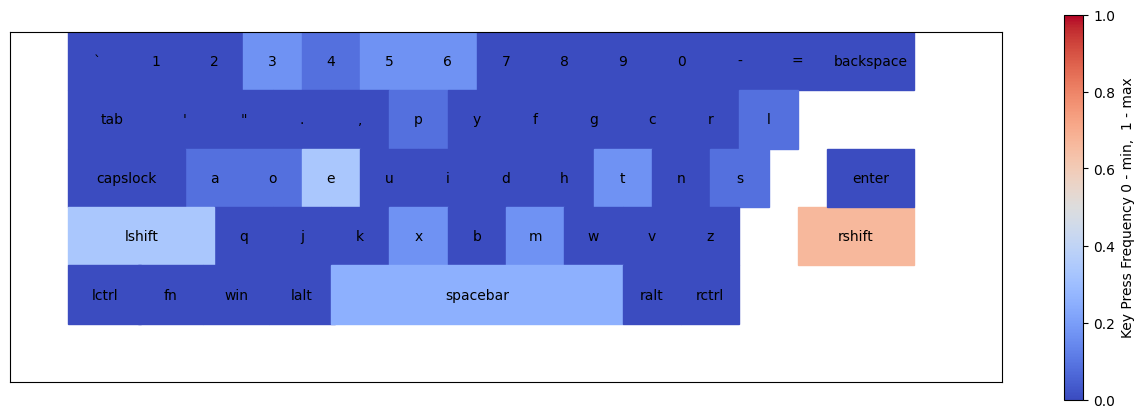

In [ ]:
"""
Generates a heatmap visualization of key press frequencies on a keyboard layout.

This function creates a rectangular grid where each rectangle represents a key. The color
of each rectangle indicates the frequency of key presses, with a color gradient provided by
the 'coolwarm' colormap. The following components are included:

1. Rectangles for each key, positioned based on provided coordinates and sized according to
   specified widths and heights.
2. Annotations centered within each rectangle, displaying the corresponding key label.
3. A color bar indicating the frequency scale, ranging from 0 (minimum frequency) to 1
   (maximum frequency).
4. Axes are adjusted for a clean visualization, with grid lines removed and ticks hidden.
"""


fig, ax = plt.subplots(figsize=(16, 5))

cmap = cm.get_cmap('coolwarm')


for (x, y), w, h, label, value in zip(positionss, widths, heights, annotations, heatmap_values):
    color = cmap(value)
    rect = plt.Rectangle((x - w / 2, y - h / 2), w, h, fill=True, color=color, edgecolor='black', lw=1)
    ax.add_patch(rect)
    plt.text(x, y, label, ha='center', va='center', fontsize=10)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Key Press Frequency 0 - min,  1 - max')

ax.set_xlim(-1, 16)
ax.set_ylim(-1, 5)
ax.set_aspect('equal')
ax.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
"""
Calculates the total finger travel distance required to type a given text based on a keyboard layout.
The algorithm measures the Euclidean distance between each typed character (not in the home row) and
the nearest home row key, weighted by the character's frequency in the input text.

Steps:
1. Defines the home row keys based on the keyboard layout.
2. Calculates the Euclidean distance between each character's position and the nearest home row key.
3. Multiplies the distance by the frequency of the character in the input text.
4. Doubles the total distance to account for finger return to the home row after each keystroke.
"""



home_row_keys_indices = [0, 1, 2, 3, 6, 7, 8, 9]
home_row_keys = [keyboard_layout['row3']['keys'][i] for i in home_row_keys_indices] + ['spacebar']

def calculate_distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def find_nearest_home_key(char_position):
    min_distance = float('inf')
    nearest_home_key = None

    for key, position in zip(keyboard_layout['row3']['keys'], keyboard_layout['row3']['positions']):
        if key in home_row_keys:
            if abs(position[0] - char_position[0]) <= 1.5:
                distance = calculate_distance(position, char_position)
                if distance < min_distance:
                    min_distance = distance
                    nearest_home_key = key
    return nearest_home_key, min_distance


total_distance = 0.0

input_dictionary = dict_sample_text

for char, count in input_dictionary.items():
    if char.lower() in home_row_keys:
        continue
    char_position = None
    for row in keyboard_layout.values():
        if char.lower() in row['keys']:
            char_position = row['positions'][row['keys'].index(char.lower())]
            break

    if char_position:
        nearest_home_key, distance = find_nearest_home_key(char_position)
        if nearest_home_key:
            total_distance += distance * count

total_distance = total_distance * 2
print("Total finger travel distance:", total_distance)

Total finger travel distance: 55.166928249863595


# BONUS: Animation of typing process:

Which keyboard (enter 1, 2, or 3):
1. QWERTY
2. Dvorak
3. Colemak
1
Enter a string: fc %^& lksd *(


<ipython-input-3-3d7e9c9eed37>:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')
<ipython-input-3-3d7e9c9eed37>:165: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((key_x - 0.5, key_y - 0.5), 1, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
<ipython-input-3-3d7e9c9eed37>:172: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle((x_space - 2.5, y_space - 0.5), 5, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
<ipython-input-3-3d7e9c9eed37>:128: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect_shift = plt.Rectangle((x_shift - 0.5, y_shift - 0.5), 2, 1, fill=True, color=cmap(0.8), edg

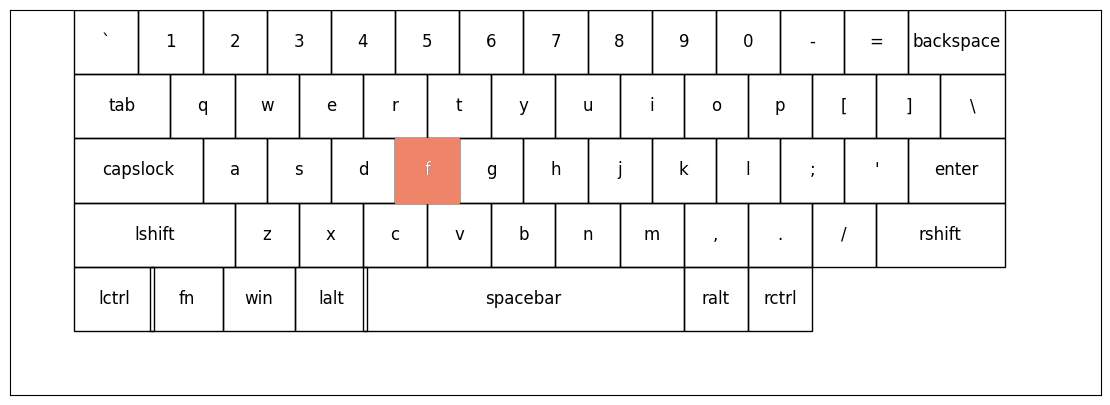

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation


keyboard = int(input('Which keyboard (enter 1, 2, or 3):\n1. QWERTY\n2. Dvorak\n3. Colemak\n'))


row1_keys = ''
row2_keys = ''
row3_keys = ''
row4_keys = ''

if keyboard == 1:
    row1_keys = '`1234567890-='
    row2_keys = 'qwertyuiop[]\\'
    row3_keys = 'asdfghjkl;\''
    row4_keys = 'zxcvbnm,./'
elif keyboard == 2:
    row1_keys = '`1234567890-='
    row2_keys = '\'".,pyfgcrl'
    row3_keys = 'aoeuidhtns'
    row4_keys = 'qjkxbmwvz'
elif keyboard == 3:
    row1_keys = '`1234567890-='
    row2_keys = 'qwfpgjluy;'
    row3_keys = 'arstdhneio'
    row4_keys = 'zxcvbm,./'
else:
    print("Invalid choice. Please enter 1, 2, or 3.")



special_keys = ['tab', 'capslock', 'lshift', 'lctrl', 'fn', 'win', 'lalt', 'spacebar', 'ralt', 'rctrl', 'rshift', 'enter', 'backspace']

keyboard_layout = {
    'row1': {
        'keys': row1_keys,
        'positions': [
            (0.5, 4.5), (1.5, 4.5), (2.5, 4.5), (3.5, 4.5), (4.5, 4.5), (5.5, 4.5), (6.5, 4.5), (7.5, 4.5), (8.5, 4.5), (9.5, 4.5), (10.5, 4.5), (11.5, 4.5), (12.5, 4.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row2': {
        'keys': row2_keys,
        'positions': [
            (2, 3.5), (3, 3.5), (4, 3.5), (5, 3.5), (6, 3.5), (7, 3.5), (8, 3.5), (9, 3.5), (10, 3.5), (11, 3.5), (12, 3.5), (13, 3.5), (14, 3.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row3': {
        'keys': row3_keys,
        'positions': [
            (2.5, 2.5), (3.5, 2.5), (4.5, 2.5), (5.5, 2.5), (6.5, 2.5), (7.5, 2.5), (8.5, 2.5), (9.5, 2.5), (10.5, 2.5), (11.5, 2.5), (12.5, 2.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'row4': {
        'keys': row4_keys,
        'positions': [
            (3, 1.5), (4, 1.5), (5, 1.5), (6, 1.5), (7, 1.5), (8, 1.5), (9, 1.5), (10, 1.5), (11, 1.5), (12, 1.5)
        ],
        'width': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
    },
    'common_keys': {
        'keys': special_keys,
        'positions': [
            (0.75, 3.5), (1, 2.5), (1.25, 1.5), (0.625, 0.5), (1.75, 0.5), (2.875, 0.5), (4, 0.5), (7, 0.5), (10, 0.5), (11, 0.5), (13.5, 1.5), (13.75, 2.5), (13.75, 4.5)
        ],
        'width': [1.5, 2, 2.5, 1.25, 1.125, 1.125, 1.125, 5, 1, 1, 2, 1.5, 1.5]
    }
}


shift_characters = {
    '1': '!', '2': '@', '3': '#', '4': '$', '5': '%', '6': '^',
    '7': '&', '8': '*', '9': '(', '0': ')', '`': '~', '-': '_',
    '=': '+', '[': '{', ']': '}', '\\': '|', ';': ':', '\'': '"',
    ',': '<', '.': '>', '/': '?'
}


sample_text = input('Enter a string: ')
keys = [char for char in sample_text]


fig, ax = plt.subplots(figsize=(16, 5))
cmap = cm.get_cmap('coolwarm')


shift_active = False

def draw_keyboard():
    """
    Draws the entire keyboard layout with rectangular boxes representing each key.
    The positions and key labels are defined based on the selected keyboard layout.
    """
    ax.clear()

    for row in keyboard_layout.values():
        for key, pos, wid in zip(row['keys'], row['positions'], row['width']):
            x, y = pos
            rect = plt.Rectangle((x - wid / 2, y - 0.5), wid, 1, fill=False, edgecolor='black', lw=1)
            ax.add_patch(rect)
            plt.text(x, y, key, ha='center', va='center', fontsize=12)

    ax.set_xlim(-1, 16)
    ax.set_ylim(-1, 5)
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])

def highlight_shift(key_x):
    """
    Highlights the shift key when the typed key requires a shift (i.e., for uppercase or special characters).
    The shift key on the appropriate side (left or right) of the keyboard is highlighted.
    """
    keyboard_middle_x = 7

    if key_x < keyboard_middle_x:
        shift_idx = keyboard_layout['common_keys']['keys'].index('rshift')
        shift_key = 'rshift'
    else:
        shift_idx = keyboard_layout['common_keys']['keys'].index('lshift')
        shift_key = 'lshift'

    x_shift, y_shift = keyboard_layout['common_keys']['positions'][shift_idx]
    rect_shift = plt.Rectangle((x_shift - 0.5, y_shift - 0.5), 2, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
    ax.add_patch(rect_shift)
    plt.text(x_shift, y_shift, shift_key, ha='center', va='center', fontsize=12, color='white')

def animate(i):
    """
    Animates each keypress in the input string. For each character:
    - It checks if a shift key is required (for uppercase or special characters).
    - Highlights the pressed key, and if needed, the shift key.
    - Handles both regular keys and special cases like the spacebar.
    """
    draw_keyboard()
    key = keys[i]
    lower_key = key.lower()

    shift_needed = key.isupper() or key in shift_characters.values()

    if shift_needed:
        if key in shift_characters.values():
            for normal_key, shifted_key in shift_characters.items():
                if key == shifted_key:
                    lower_key = normal_key

        for row in keyboard_layout.values():
            if lower_key in row['keys']:
                idx = row['keys'].index(lower_key)
                key_x, key_y = row['positions'][idx]
                highlight_shift(key_x)
                rect = plt.Rectangle((key_x - 0.5, key_y - 0.5), 1, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
                ax.add_patch(rect)
                plt.text(key_x, key_y, lower_key, ha='center', va='center', fontsize=12, color='white')

    else:
        for row in keyboard_layout.values():
            if lower_key in row['keys']:
                idx = row['keys'].index(lower_key)
                key_x, key_y = row['positions'][idx]
                rect = plt.Rectangle((key_x - 0.5, key_y - 0.5), 1, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
                ax.add_patch(rect)
                plt.text(key_x, key_y, lower_key, ha='center', va='center', fontsize=12, color='white')

    if lower_key == ' ':
        idx = keyboard_layout['common_keys']['keys'].index('spacebar')
        x_space, y_space = keyboard_layout['common_keys']['positions'][idx]
        rect = plt.Rectangle((x_space - 2.5, y_space - 0.5), 5, 1, fill=True, color=cmap(0.8), edgecolor='black', lw=1)
        ax.add_patch(rect)
        plt.text(x_space, y_space, 'spacebar', ha='center', va='center', fontsize=12, color='white')


ani = animation.FuncAnimation(fig, animate, frames=len(keys), interval=500, repeat=False)
from IPython.display import HTML
HTML(ani.to_jshtml())
